# WeatherPy

---

Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated.

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | san antonio de pale
Processing Record 3 of Set 1 | ulladulla
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | dryden
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | nago
Processing Record 9 of Set 1 | barah
Processing Record 10 of Set 1 | mili
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | nea moudhania
City not found. Skipping... Error: 'coord'
Processing Record 14 of Set 1 | keflavik
Processing Record 15 of Set 1 | hadibu
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | olaine
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | papatowai
Processing Record

In [28]:
# Convert the cities weather data into a Pandas DataFrame
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64


In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,276.87,93,100,1.79,CA,1720163459
1,san antonio de pale,-1.4014,5.6325,296.75,80,100,5.77,GQ,1720163690
2,ulladulla,-35.3500,150.4667,286.35,68,76,3.90,AU,1720163691
3,grytviken,-54.2811,-36.5092,268.24,63,100,1.74,GS,1720163426
4,puerto ayora,-0.7393,-90.3518,295.12,96,95,1.34,EC,1720163694


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,276.87,93,100,1.79,CA,1720163459
1,san antonio de pale,-1.4014,5.6325,296.75,80,100,5.77,GQ,1720163690
2,ulladulla,-35.3500,150.4667,286.35,68,76,3.90,AU,1720163691
3,grytviken,-54.2811,-36.5092,268.24,63,100,1.74,GS,1720163426
4,puerto ayora,-0.7393,-90.3518,295.12,96,95,1.34,EC,1720163694
...,...,...,...,...,...,...,...,...,...
570,aldan,58.6031,125.3894,291.01,45,100,3.80,RU,1720164521
571,okha,53.5739,142.9478,290.79,87,71,3.49,RU,1720164330
572,cody,44.5263,-109.0565,285.38,75,20,3.09,US,1720164524


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

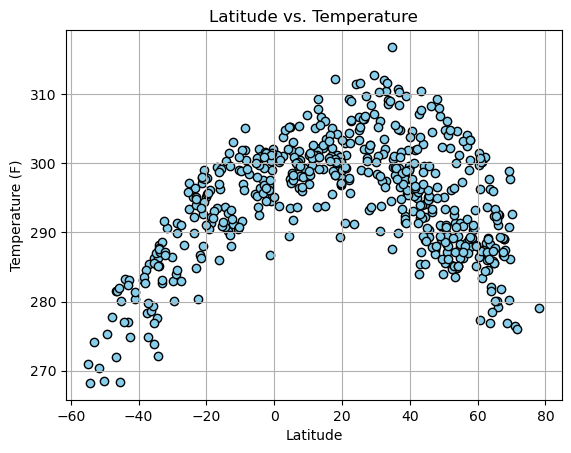

In [32]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt

# Assuming you have latitude and temperature data in two lists: latitude_data and temperature_data
# Replace latitude_data and temperature_data with your actual data

plt.scatter([city['Lat'] for city in city_data], [city['Max Temp'] for city in city_data], marker="o", color="skyblue", edgecolors="black")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.savefig("output_data/Fig1.png")
plt.show()


#### Latitude Vs. Humidity

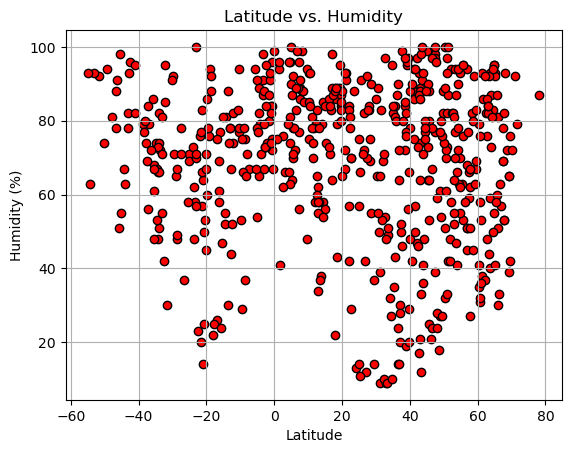

In [14]:
import matplotlib.pyplot as plt

# Assuming you have latitude and humidity data in two lists: latitude_data and humidity_data
# Replace latitude_data and humidity_data with your actual data

plt.scatter([city['Lat'] for city in city_data], [city['Humidity'] for city in city_data], marker="o", color="red", edgecolors="black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

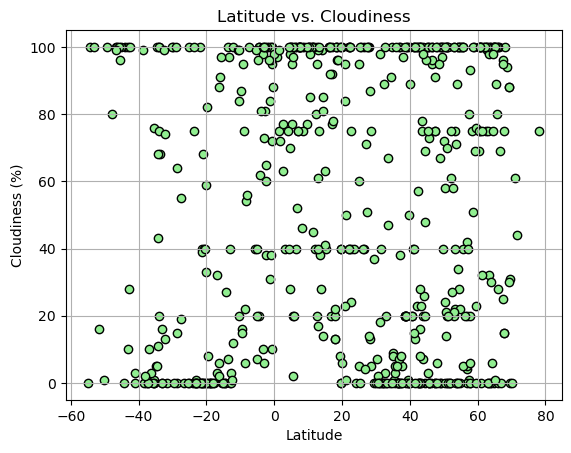

In [15]:
import matplotlib.pyplot as plt

# Assuming you have latitude and cloudiness data in two lists: latitude_data and cloudiness_data
# Replace latitude_data and cloudiness_data with your actual data

plt.scatter([city['Lat'] for city in city_data], [city['Cloudiness'] for city in city_data], marker="o", color="lightgreen", edgecolors="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

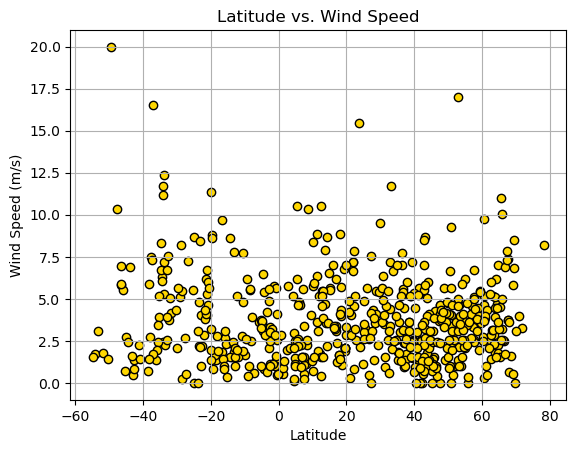

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Assuming you have latitude and wind speed data in two lists: latitude_data and wind_speed_data
# Replace latitude_data and wind_speed_data with your actual data

plt.scatter([city['Lat'] for city in city_data], [city['Wind Speed'] for city in city_data], marker="o", color="gold", edgecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

In [18]:
northern_df = [city for city in city_data if city['Lat'] >= 0]

# Create a DataFrame using the filtered Northern Hemisphere data
northern_df = pd.DataFrame(northern_df)

# Display the DataFrame with Northern Hemisphere data
print(northern_df)


           City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       iqaluit  63.7506  -68.5145    276.87        93         100   
1        dryden  49.7833  -92.7503    289.31        88          40   
2          nago  26.5881  127.9761    306.39        72          40   
3         barah  13.7000   30.3667    306.68        38          28   
4          mili   6.0815  171.7350    301.51        72         100   
..          ...      ...       ...       ...       ...         ...   
400     braslaw  55.6440   27.0455    287.22        95         100   
401       aldan  58.6031  125.3894    291.01        45         100   
402        okha  53.5739  142.9478    290.79        87          71   
403        cody  44.5263 -109.0565    285.38        75          20   
404  strezhevoy  60.7333   77.5889    300.76        32         100   

     Wind Speed Country        Date  
0          1.79      CA  1720163459  
1          2.06      CA  1720163695  
2          2.64      JP  1720163439  
3      

In [19]:
import pandas as pd

# Assuming southern_df is a list of dictionaries
southern_df = [city for city in city_data if city['Lat'] <= 0]

# Create a DataFrame from the list of dictionaries
southern_df = pd.DataFrame(southern_df)

# Display the DataFrame
print(southern_df)

                    City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    san antonio de pale  -1.4014    5.6325    296.75        80         100   
1              ulladulla -35.3500  150.4667    286.35        68          76   
2              grytviken -54.2811  -36.5092    268.24        63         100   
3           puerto ayora  -0.7393  -90.3518    295.12        96          95   
4               waitangi -43.9535 -176.5597    283.28        63         100   
..                   ...      ...       ...       ...       ...         ...   
165              manggar  -2.8833  108.2667    300.95        79         100   
166           taguatinga -12.3857  -46.5711    292.01        52           1   
167             tome acu  -2.4189  -48.1522    296.45        95          65   
168               paraty -23.2178  -44.7131    294.87        57           0   
169              kawerau -38.1000  176.7000    282.65        80           2   

     Wind Speed Country        Date  
0          5.

###  Temperature vs. Latitude Linear Regression Plot

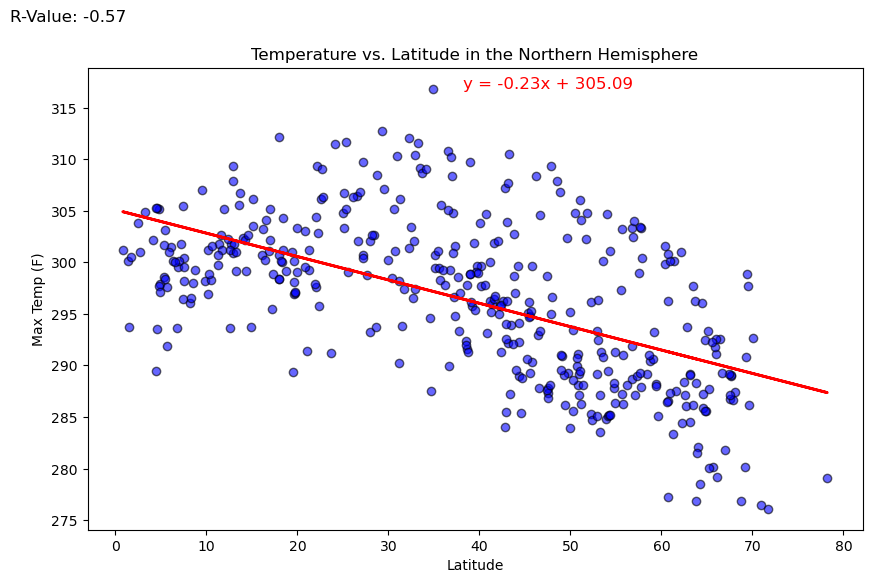

In [34]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the figure size
plt.figure(figsize=(10, 6))  

# Create a scatter plot
plt.scatter(northern_df['Lat'], northern_df['Max Temp'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Temperature vs. Latitude in the Northern Hemisphere')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Max Temp'])

# Calculate the regression line
regression_line = slope * northern_df['Lat'] + intercept

# Plot the regression line
plt.plot(northern_df['Lat'], regression_line, color='red', linewidth=2)

# Annotate the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(northern_df['Lat'].mean(), northern_df['Max Temp'].max(), equation, color='red', fontsize=12)

#Annotate the chart with the r-value
plt.text(-0.1, 1.1, f'R-Value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.show()


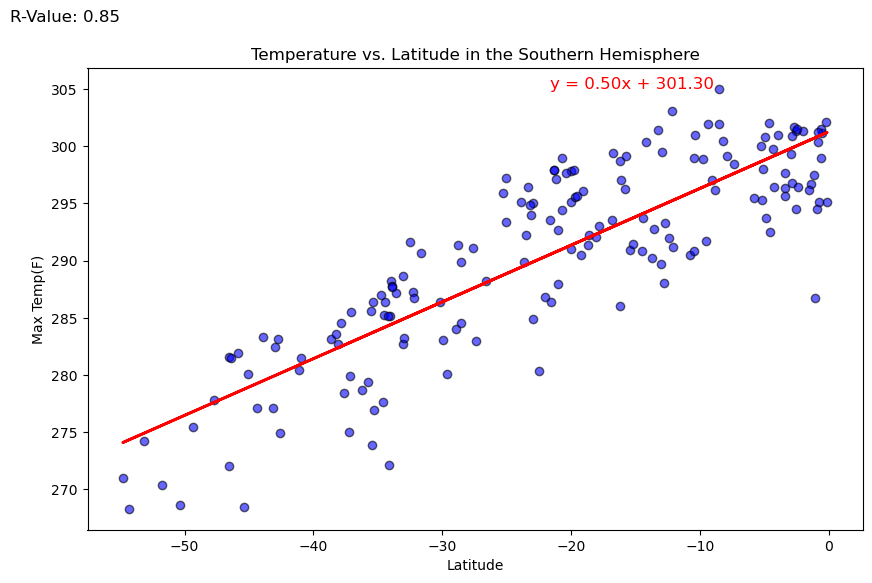

In [35]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the figure size
plt.figure(figsize=(10, 6))  

# Create a scatter plot
plt.scatter(southern_df['Lat'],southern_df ['Max Temp'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.title('Temperature vs. Latitude in the Southern Hemisphere')


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Max Temp'])

# Calculate the regression line
regression_line = slope * southern_df['Lat'] + intercept

# Plot the regression line
plt.plot(southern_df['Lat'], regression_line, color='red', linewidth=2)

# Annotate the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(southern_df['Lat'].mean(), southern_df['Max Temp'].max(), equation, color='red', fontsize=12)

#Annotate the chart with the r-value
plt.text(-0.1, 1.1, f'R-Value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Display the plot
plt.show()

**Discussion about the linear relationship: **TEMPERATURE AND LATITUDE  


The scatter plots above demonstrate that there is a correlation between latitude and temperature. The Southern Hemisphere plot has a positive slope (y=0.49) which suggests that as you move further south, the temperature tends to increase. The Northern Hemisphere plot has a negative slope (y=0.28) which demonstrates a negative trend downwards, that is, as you move further north the temperatures generally increase. If we consider latitude as the independent variable and the temperature of the dependant variable, these visualisations provide a linear relationship between where a city is situated in relation to the Earth's equator (the latitude) will correlate to a change in temperature in that city. 


### Humidity vs. Latitude Linear Regression Plot

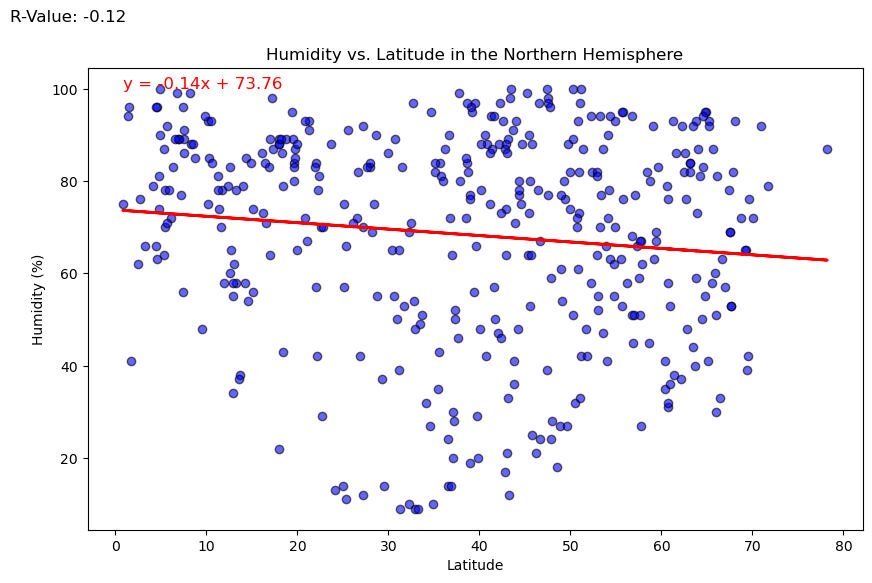

In [36]:
# Northern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(northern_df['Lat'], northern_df['Humidity'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in the Northern Hemisphere')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Humidity'])

# Calculate the regression line
regression_line = slope * northern_df['Lat'] + intercept

# Plot the regression line
plt.plot(northern_df['Lat'], regression_line, color='red', linewidth=2)

# Annotate the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(northern_df['Lat'].min(), northern_df['Humidity'].max(), equation, color='red', fontsize=12)

#Annotate the chart with the r-value
plt.text(-0.1, 1.1, f'R-Value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Display the plot
plt.show()

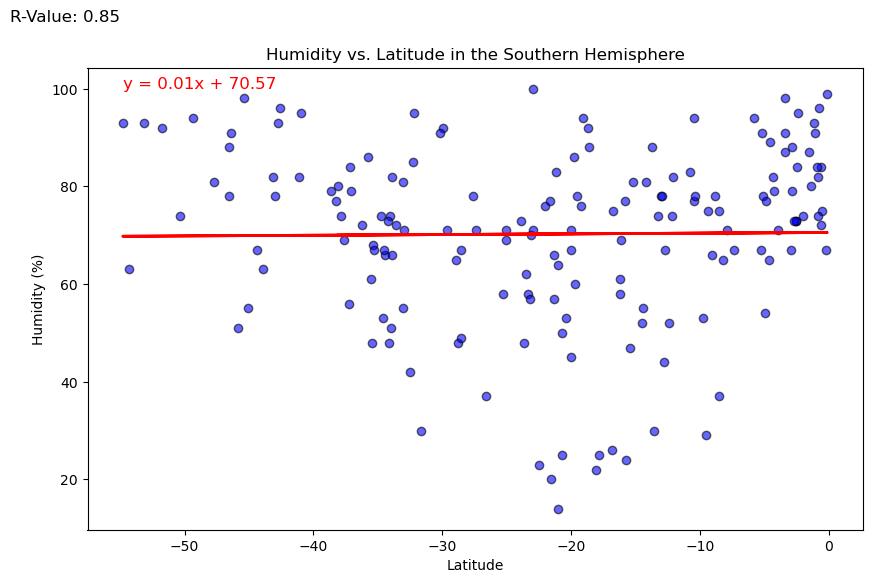

In [23]:
# Southern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(southern_df['Lat'], southern_df['Humidity'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude in the Southern Hemisphere')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Humidity'])

# Calculate the regression line
regression_line = slope * southern_df['Lat'] + intercept

# Plot the regression line
plt.plot(southern_df['Lat'], regression_line, color='red', linewidth=2)

# Annotate the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(southern_df['Lat'].min(), southern_df['Humidity'].max(), equation, color='red', fontsize=12)

#Annotate the chart with the r-value
plt.text(-0.1, 1.1, 'R-Value: 0.85', transform=plt.gca().transAxes, fontsize=12, color='black')

# Display the plot
plt.show()

**Discussion about the linear relationship: ** HUMIDITY AND LATITIUDE:  


The visual charts above that plot the correlations between humidity and latitude demonstrate a weak linear relationship between these two variables. The Northern hemisphere chart plots a regression slope of (y=0.04) and the Southern hemisphere (y=-0.03), suggesting they have similar correlations both positively and negatively. That is, the humidity of a city will have minimal changes (increases or decreases) with each change in the position of the city in relation to the Earth's eqor.uat





### Cloudiness vs. Latitude Linear Regression Plot

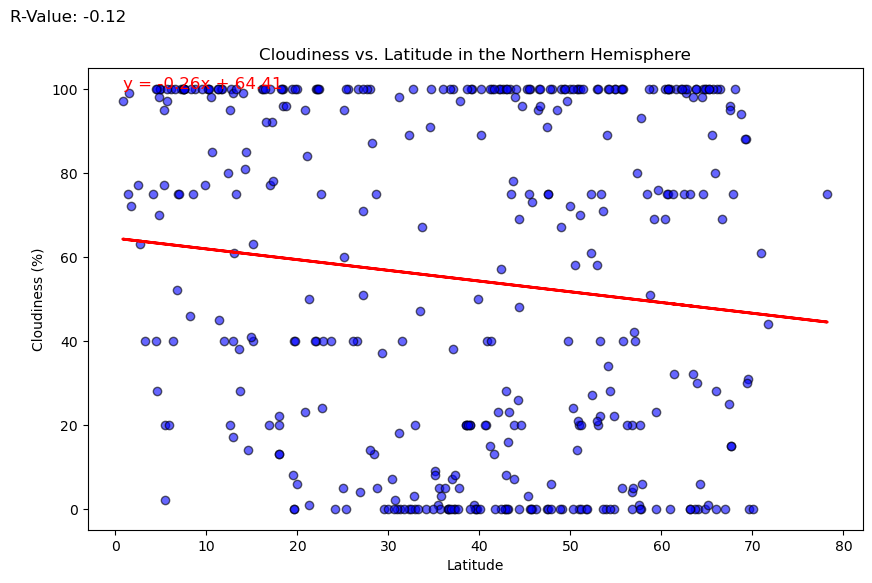

In [37]:
# Northern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(northern_df['Lat'], northern_df['Cloudiness'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude in the Northern Hemisphere')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'],northern_df['Cloudiness'])

# Calculate the regression line
regression_line = slope * northern_df['Lat'] + intercept

# Plot the regression line
plt.plot(northern_df['Lat'], regression_line, color='red', linewidth=2)

# Annotate the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(northern_df['Lat'].min(), northern_df['Cloudiness'].max(), equation, color='red', fontsize=12)


#Annotate the chart with the r-value
plt.text(-0.1, 1.1, f'R-Value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Display the plot
plt.show()

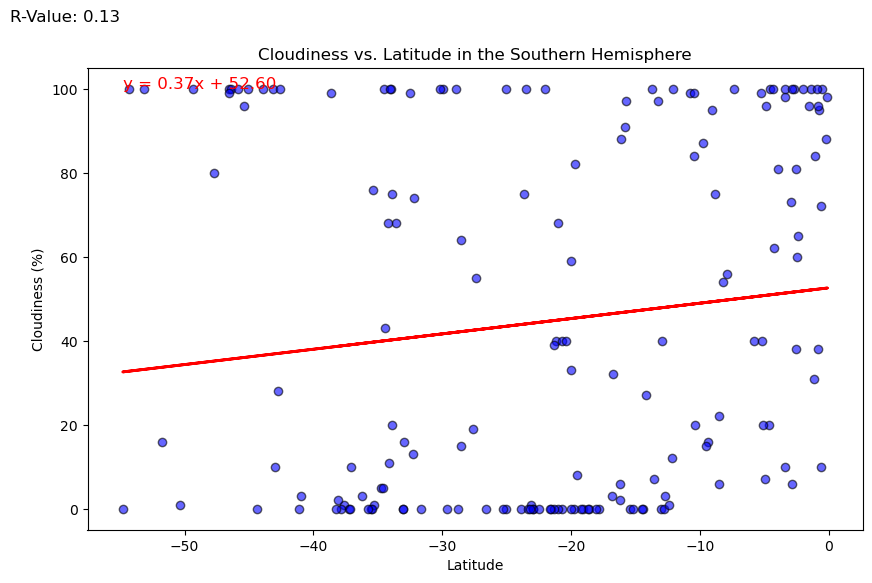

In [38]:
# Southern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(southern_df['Lat'], southern_df['Cloudiness'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude in the Southern Hemisphere')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Cloudiness'])

# Calculate the regression line
regression_line = slope * southern_df['Lat'] + intercept

# Plot the regression line
plt.plot(southern_df['Lat'], regression_line, color='red', linewidth=2)

# Annotate the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(southern_df['Lat'].min(), southern_df['Cloudiness'].max(), equation, color='red', fontsize=12)

#Annotate the chart with the r-value
plt.text(-0.1, 1.1, f'R-Value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Display the plot
plt.show()

**Discussion about the linear relationship: ** CLOUDINESS AND LATITUDE:  

The correlation charts above reflect different correlations for the Northern and Southern hemispheres in relation to cloudiness levels. In the Northern hemisphere the slope is nearly horizontal (y=0.01), and therefore indicates that cities in the Northern hemisphere will ha very little change in terms of cloudiness s regardless of their location relative to the Earth's equator. In the Southern hemisphere however, there is a positive correlation (y=0.35) between change in the position of a city and the level of cloudiness presere. This chart demonstrates that if a city in the Southern Hemisphere is located closer to the equatore greater levels of cloudiness will exist. 

### Wind Speed vs. Latitude Linear Regression Plot

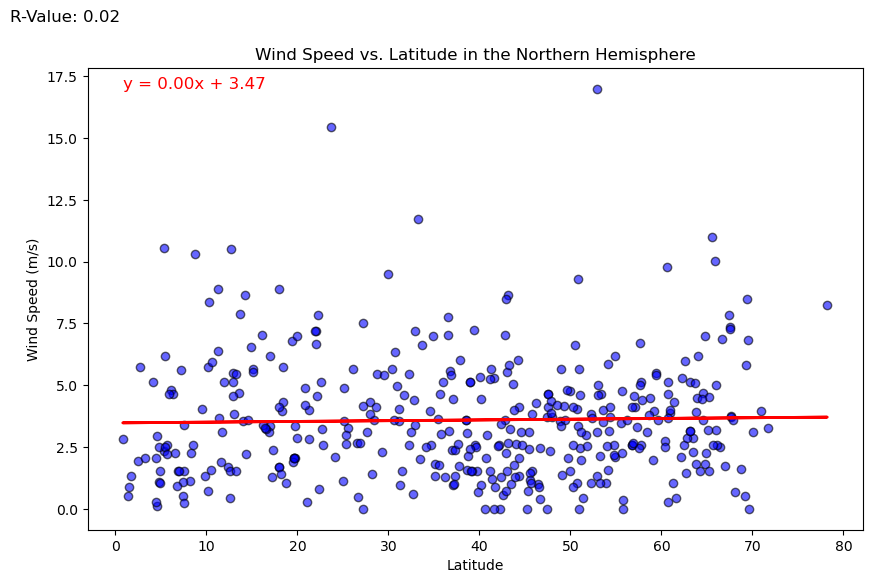

In [39]:
# Northern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(northern_df['Lat'], northern_df['Wind Speed'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude in the Northern Hemisphere')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Wind Speed'])

# Calculate the regression line
regression_line = slope * northern_df['Lat'] + intercept

# Plot the regression line
plt.plot(northern_df['Lat'], regression_line, color='red', linewidth=2)

# Annotate the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(northern_df['Lat'].min(), northern_df['Wind Speed'].max(), equation, color='red', fontsize=12)


#Annotate the chart with the r-value
plt.text(-0.1, 1.1, f'R-Value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Display the plot
plt.show()

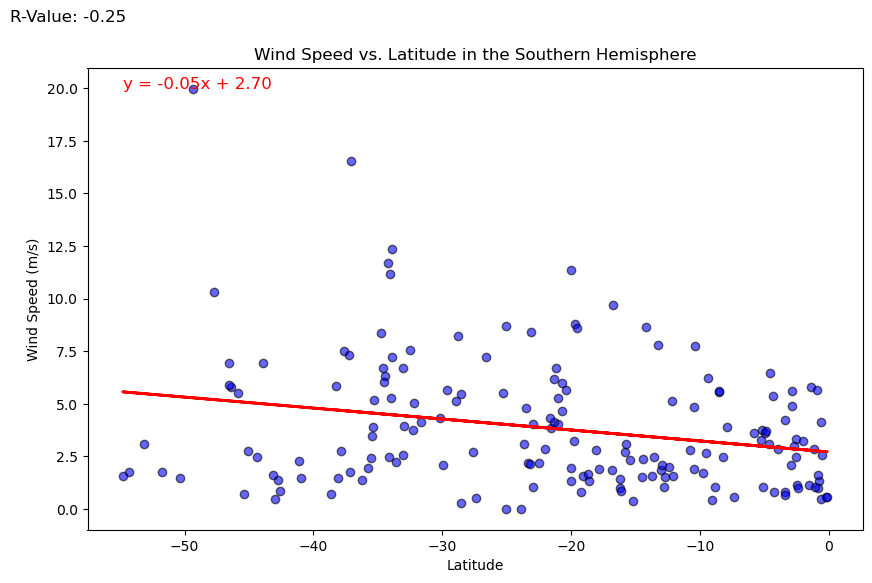

In [40]:
# Southern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(southern_df['Lat'], southern_df['Wind Speed'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude in the Southern Hemisphere')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Wind Speed'])

# Calculate the regression line
regression_line = slope * southern_df['Lat'] + intercept

# Plot the regression line
plt.plot(southern_df['Lat'], regression_line, color='red', linewidth=2)

# Annotate the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(southern_df['Lat'].min(), southern_df['Wind Speed'].max(), equation, color='red', fontsize=12)

#Annotate the chart with the r-value
plt.text(-0.1, 1.1, f'R-Value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Display the plot
plt.show()

**Discussion about the linear relationship: ** WIND SPEED AND LATITITUDE: 


The above correlation plot charts show the relationships between wind speed and where a city is located (in terms of latitude) in either the Northen Hemisphere or Southern Hemisphere. In the Northern Hemisphere there is a small inverse correlation (y=-0.01) that would suggest that the further a city is located from the equator, the less windy (or speed of wind) it is. However, in the Southern hemisph,ere the charts suggest that there is no relationshbetweeen the distance ar a city is from the equator and the wind speed in thatty. ci

Overall 

These plots provide interesting visual information that may be important when considering a city one might prefer to live in if temperature, humidity, cloudiness and wind speed are priorities for consideration.  These correlations can help with decisions for individuals and populations on where they may like to be situated. For example, if you prefer a hot climate, you are more likely to experience this in city that is in the Southern hemisphere far from the eq. as B If however, one is keen for cloudy cover, they could consider a city close in the Southern hemisphere close to the or. ty. 